In [3]:
from sklearn.datasets import load_digits
digits = load_digits()

Populating the interactive namespace from numpy and matplotlib


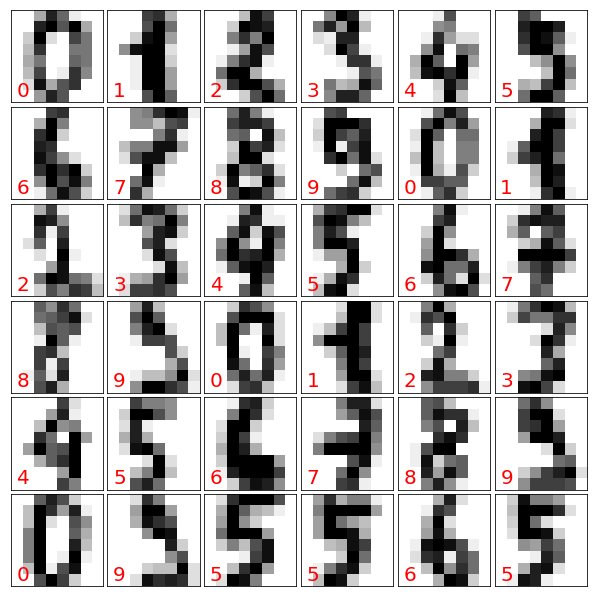

In [10]:
%pylab inline
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(8,8))
fig.subplots_adjust(left=0,right=1,bottom=0,top=1,hspace=0.05,wspace=0.05)
for i in range(36):
    ax=fig.add_subplot(6,6,i+1,xticks=[],yticks=[])
    ax.imshow(digits.images[i],cmap=plt.cm.binary,interpolation='nearest')
    ax.text(0,7,str(digits.target[i]),color="red",fontsize=20)
    

In [12]:
digits.data

array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   1., ...,   6.,   0.,   0.],
       [  0.,   0.,   2., ...,  12.,   0.,   0.],
       [  0.,   0.,  10., ...,  12.,   1.,   0.]])

In [13]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(digits.data)
X_scaled=scaler.transform(digits.data)
X_scaled

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ..., 
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [18]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(hidden_layer_sizes=(30,30,30),activation='logistic',max_iter=1000)
mlp.fit(X_scaled,digits.target)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [19]:
predicted = mlp.predict(X_scaled)

Populating the interactive namespace from numpy and matplotlib


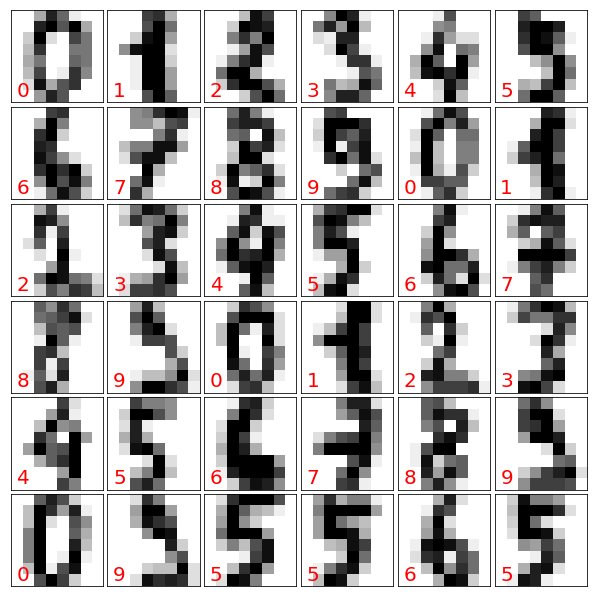

In [20]:
%pylab inline
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(8,8))
fig.subplots_adjust(left=0,right=1,bottom=0,top=1,hspace=0.05,wspace=0.05)
for i in range(36):
    ax=fig.add_subplot(6,6,i+1,xticks=[],yticks=[])
    ax.imshow(digits.images[i],cmap=plt.cm.binary,interpolation='nearest')
    ax.text(0,7,str(predicted[i]),color="red",fontsize=20)
    

In [22]:
sum(predicted == digits.target) /len(digits.target)

1.0

## PDF Decrypt

In [23]:
! pip install pdfminer3k

  Cache entry deserialization failed, entry ignored
Cache entry deserialization failed, entry ignored


In [27]:
from pdfminer.pdfparser import PDFParser, PDFDocument
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import PDFPageAggregator
from pdfminer.layout import LAParams, LTTextBox, LTTextLine

s = ''
fp = open('ironman.pdf', 'rb')
parser = PDFParser(fp)
doc = PDFDocument()
parser.set_document(doc)
doc.set_parser(parser)
doc.initialize('')
rsrcmgr = PDFResourceManager()
laparams = LAParams()
device = PDFPageAggregator(rsrcmgr, laparams=laparams)
interpreter = PDFPageInterpreter(rsrcmgr, device)
# Process each page contained in the document.
for page in doc.get_pages():
    interpreter.process_page(page)
    layout = device.get_result()
    for lt_obj in layout:
        #print(lt_obj)
        pass
        #if isinstance(lt_obj, LTTextBox) or isinstance(lt_obj, LTTextLine):
        #    s = s + lt_obj.get_text()

## 模型驗證 (準確率)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
iris = load_iris()

In [29]:
clf = LogisticRegression()
clf.fit(iris.data, iris.target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [31]:
predicted = clf.predict(iris.data)

In [38]:
sum(predicted == iris.target) / len(iris.target)

0.95999999999999996

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(iris.target, predicted)

0.95999999999999996

In [35]:
a =  [0,0,1,0,0]
b =  [0,0,1,1,1]
import numpy
print(numpy.array(a) == numpy.array(b))
print(sum(numpy.array(a) == numpy.array(b)) / len(numpy.array(a)))

[ True  True  True False False]
0.6


## 建立Confusion Matrix

In [41]:
from sklearn.metrics import confusion_matrix
m = confusion_matrix(iris.target, predicted)
m

array([[50,  0,  0],
       [ 0, 45,  5],
       [ 0,  1, 49]])

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3_1\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


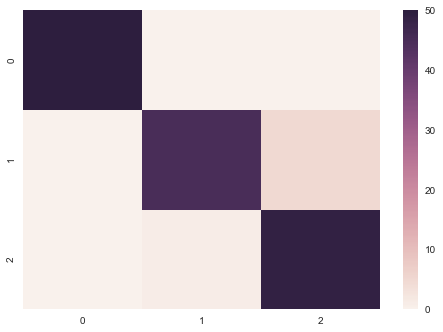

In [42]:
%pylab inline
import seaborn
seaborn.heatmap(m)

In [44]:
from sklearn.metrics import classification_report
print(classification_report(iris.target, predicted))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.98      0.90      0.94        50
          2       0.91      0.98      0.94        50

avg / total       0.96      0.96      0.96       150



In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
iris = load_iris()

In [46]:
clf = DecisionTreeClassifier()
clf.fit(iris.data, iris.target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [48]:
predicted = clf.predict(iris.data)

In [50]:
accuracy_score(iris.target, predicted)

1.0

In [51]:
confusion_matrix(iris.target, predicted)

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0,  0, 50]])

In [53]:
print(classification_report(iris.target, predicted))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       1.00      1.00      1.00        50
          2       1.00      1.00      1.00        50

avg / total       1.00      1.00      1.00       150



In [55]:
from sklearn import tree
tree.export_graphviz(clf, 'tree.dot')

## 交叉驗證

In [70]:
from sklearn.model_selection import train_test_split

a = [0,1,2,3,4,5,6]
b = [8,8,8,8,9,9,9]
res = train_test_split(a,b, test_size = 0.33, random_state = 123)
res

a_x, a_y , b_x, b_y = train_test_split(a,b, test_size = 0.33, random_state = 123)
a_x, a_y , b_x, b_y

([0, 2, 5, 6], [1, 3, 4], [8, 8, 9, 9], [8, 8, 9])

In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()

train_X, test_X, train_y, test_y = train_test_split(iris.data, iris.target, test_size = 0.33, random_state =123)

clf = DecisionTreeClassifier()
clf.fit(train_X, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [73]:
predicted = clf.predict(test_X)

In [76]:
accuracy_score(test_y, predicted)

0.95999999999999996

In [77]:
confusion_matrix(test_y, predicted)

array([[20,  0,  0],
       [ 0, 11,  0],
       [ 0,  2, 17]])

## K_Fold Cross Validation

In [83]:
from sklearn.model_selection import KFold
X = iris.data
y = iris.target
kf = KFold(n_splits = 10)
acc = []
for train, test in kf.split(X):
    train_X, test_X, train_y, test_y = X[train], X[test], y[train], y[test]
    clf = DecisionTreeClassifier()
    clf.fit(train_X, train_y)
    predicted = clf.predict(test_X)
    acc.append(accuracy_score(test_y, predicted))
print(mean(acc))

0.94


In [84]:
from sklearn.model_selection import cross_val_score
clf = DecisionTreeClassifier()
acc=cross_val_score(clf,X=iris.data,y=iris.target,cv=10)

In [86]:
acc.mean()

0.95999999999999996

In [87]:
acc.std()

0.044221663871405324

## Leave One Out Cross Validation

In [88]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
acc = []
for train, test in loo.split(X):
    train_X, test_X, train_y, test_y = X[train], X[test], y[train], y[test]
    clf = DecisionTreeClassifier()
    clf.fit(train_X, train_y)
    predicted = clf.predict(test_X)
    acc.append(accuracy_score(test_y, predicted))

In [90]:
mean(acc)

0.93999999999999995

In [91]:
std(acc)

0.23748684174075832

In [92]:
len(acc)

150

## ROC Curve

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
iris = load_iris()
clf = LogisticRegression()
clf.fit(iris.data, iris.target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [95]:
clf.predict(iris.data)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [97]:
#clf.predict_proba(iris.data)

In [98]:
X = iris.data[50:150, :]
y = iris.target[50:150]

In [102]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [150]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.33,random_state=123)
clf=DecisionTreeClassifier(max_depth=2)
clf.fit(train_X,train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [151]:
proba_ = clf.predict_proba(test_X)

In [152]:

from sklearn.metrics import confusion_matrix
import numpy as np
tpr_ary = [0]
fpr_ary = [0]
for threshold in range(0,11):
    threshold = threshold * 0.1
    predicted = (proba_[:,1] >= threshold).astype(int)
    m = confusion_matrix(test_y, predicted)
    tp = m[0,0]
    fn = m[1,0]
    fp = m[0,1]
    tn = m[1,1]
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)
    
    if (not np.isnan(tpr)) and (not np.isnan(fpr)):        
        tpr_ary.append(tpr)
        fpr_ary.append(fpr)

tpr_ary.append(1)
fpr_ary.append(1)

C:\ProgramData\Anaconda3_1\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in long_scalars
  


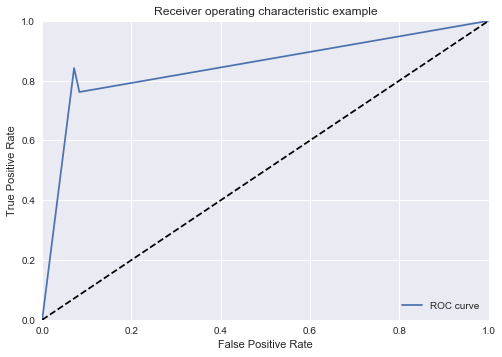

In [153]:
import matplotlib.pyplot as plt
plt.plot(fpr_ary, tpr_ary,label='ROC curve')
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [155]:
probas_=clf.fit(train_X,train_y).predict_proba(test_X)
probas_[:,1]

array([ 0.        ,  1.        ,  1.        ,  0.        ,  0.57142857,
        0.        ,  0.        ,  1.        ,  1.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.57142857,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  1.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  1.        ,  1.        ])

In [156]:
from sklearn.metrics import roc_curve 
fpr,tpr,thresholds=roc_curve(test_y,probas_[:,1])

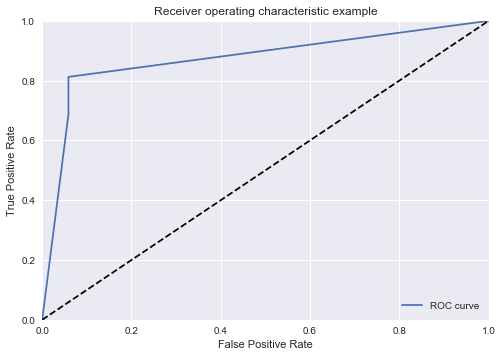

In [157]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr,label='ROC curve')
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [158]:
from sklearn.metrics import auc
roc_auc=auc(fpr,tpr)
print("Area under the ROC curve : %f"%roc_auc)

Area under the ROC curve : 0.873162


In [159]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

clf1 = DecisionTreeClassifier()
clf1.fit(train_X, train_y)

clf2 = SVC(probability=True)
clf2.fit(train_X, train_y)

clf3 = LogisticRegression()
clf3.fit(train_X, train_y)

clf4 = RandomForestClassifier()
clf4.fit(train_X, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

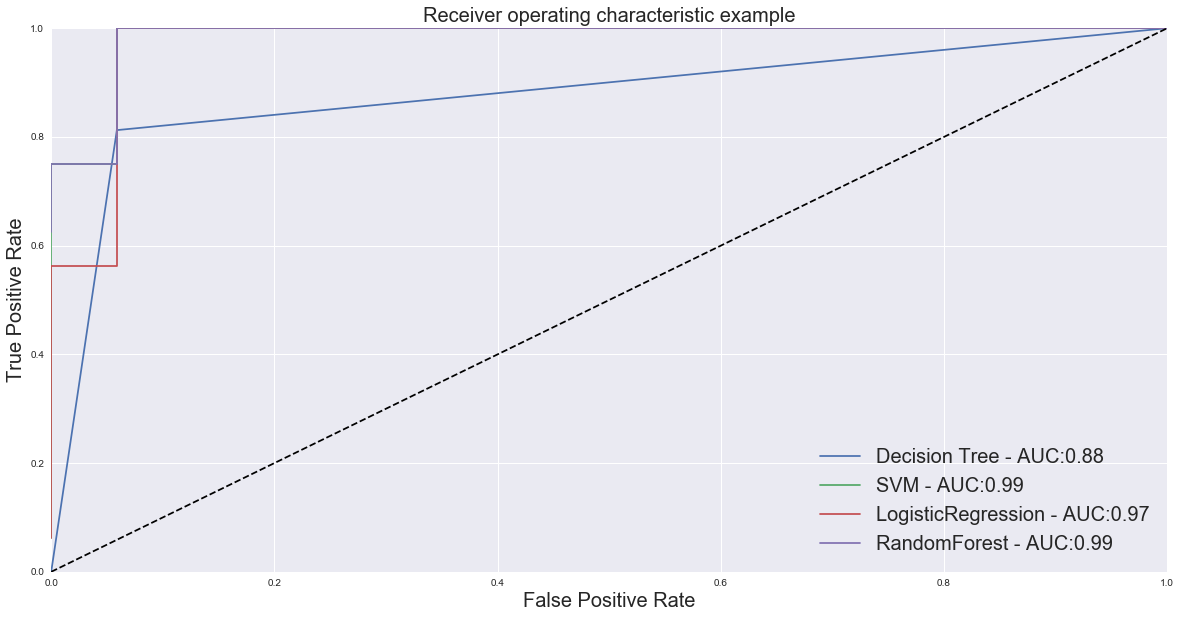

In [160]:
plt.figure(figsize= [20,10])
for clf, title in zip([clf1,clf2,clf3, clf4], ['Decision Tree', 'SVM', 'LogisticRegression', 'RandomForest']):
    probas_ = clf.fit(train_X, train_y).predict_proba(test_X)
    fpr, tpr, thresholds = roc_curve(test_y, probas_[:, 1])
    plt.plot(fpr, tpr, label='%s - AUC:%.2f'%(title, auc(fpr, tpr)) )
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate', fontsize = 20)
plt.title('Receiver operating characteristic example', fontsize = 20)
plt.legend(loc="lower right", fontsize = 20)
plt.show()

## 客戶流失分析

In [161]:
import pandas
customer = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/customer_churn.csv', index_col = 0)

In [162]:
customer.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


### 資料預處理

In [163]:
customer.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

In [166]:
X = customer[['international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls']]

In [168]:
y = customer['churn']

In [173]:
tmp = pandas.get_dummies(X['international_plan'])
tmp.columns = ['international_plan_n','international_plan_y']
international_plan = tmp['international_plan_y']

In [174]:
tmp = pandas.get_dummies(X['voice_mail_plan'])
tmp.columns = ['voice_mail_plan_n','voice_mail_plan_y']
voice_mail_plan = tmp['voice_mail_plan_y']

In [177]:
data = pandas.concat([X, international_plan, voice_mail_plan], axis = 1)
del data['international_plan']
del data['voice_mail_plan']
data.head(3)

,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,international_plan_y,voice_mail_plan_y
1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,1
2,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,1
3,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0


In [180]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
target = le.fit_transform(y)

## 分為訓練與測試資料集

In [183]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(data, target, test_size = 0.33, random_state =123)

## 產生決策樹

In [198]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(train_X, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [199]:
from sklearn import tree
tree.export_graphviz(clf, 'tree.dot')

In [201]:
print(train_X.columns)

Index(['number_vmail_messages', 'total_day_minutes', 'total_day_calls',
       'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
       'total_eve_charge', 'total_night_minutes', 'total_night_calls',
       'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge', 'number_customer_service_calls',
       'international_plan_y', 'voice_mail_plan_y'],
      dtype='object')


## 驗證結果

In [202]:
predicted = clf.predict(test_X)

In [203]:
accuracy_score(test_y, predicted)

0.93999999999999995

In [204]:
confusion_matrix(test_y, predicted)

array([[928,  22],
       [ 44, 106]])

In [206]:
print(classification_report(test_y, predicted))

             precision    recall  f1-score   support

          0       0.95      0.98      0.97       950
          1       0.83      0.71      0.76       150

avg / total       0.94      0.94      0.94      1100



## 比較不同模型

In [207]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

clf1 = DecisionTreeClassifier(max_depth=5)
clf1.fit(train_X, train_y)

clf2 = SVC(probability=True)
clf2.fit(train_X, train_y)

clf3 = LogisticRegression()
clf3.fit(train_X, train_y)

clf4 = RandomForestClassifier()
clf4.fit(train_X, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

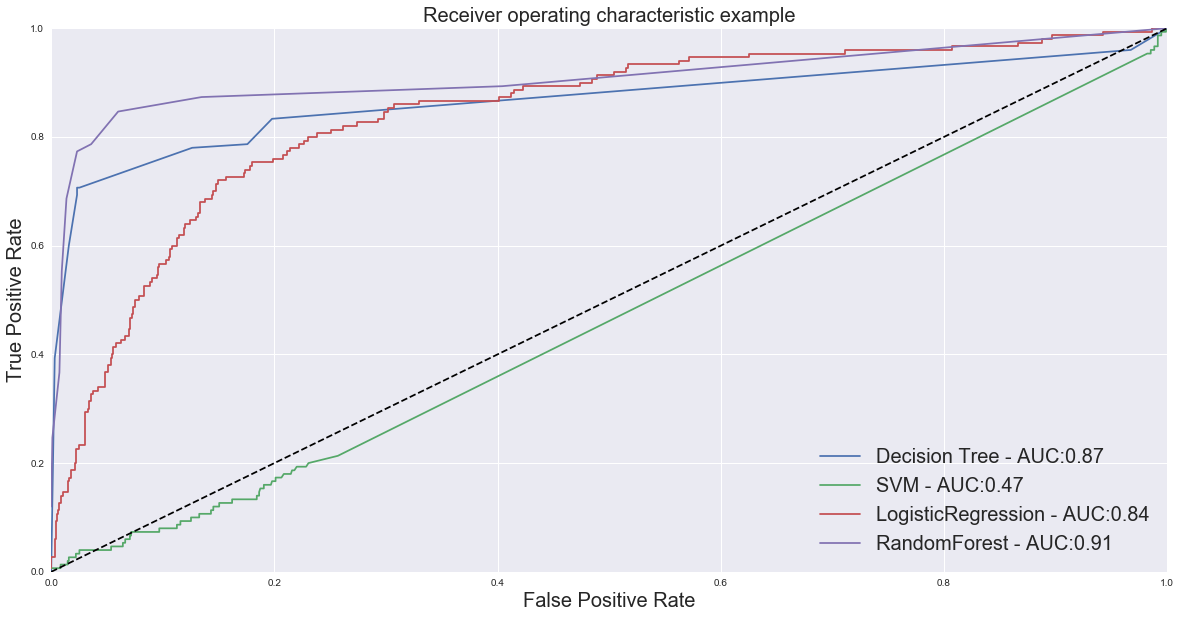

In [208]:
plt.figure(figsize= [20,10])
for clf, title in zip([clf1,clf2,clf3, clf4], ['Decision Tree', 'SVM', 'LogisticRegression', 'RandomForest']):
    probas_ = clf.fit(train_X, train_y).predict_proba(test_X)
    fpr, tpr, thresholds = roc_curve(test_y, probas_[:, 1])
    plt.plot(fpr, tpr, label='%s - AUC:%.2f'%(title, auc(fpr, tpr)) )
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate', fontsize = 20)
plt.title('Receiver operating characteristic example', fontsize = 20)
plt.legend(loc="lower right", fontsize = 20)
plt.show()

## 找出最重要的變因

In [218]:
from collections import Counter 
c = Counter(dict(zip(test_X.columns, clf4.feature_importances_)))
c.most_common(10)
#print(ele)

[('total_day_charge', 0.16249754744377196),
 ('number_customer_service_calls', 0.12502112465451315),
 ('total_day_minutes', 0.11706903430389611),
 ('total_eve_minutes', 0.067490610268968937),
 ('total_eve_charge', 0.065726656789886526),
 ('international_plan_y', 0.064863999013152041),
 ('total_intl_calls', 0.051550557740414928),
 ('total_intl_charge', 0.04461376071284627),
 ('total_night_calls', 0.04236429784893176),
 ('number_vmail_messages', 0.04234301737326427)]

## 佈署模型

In [219]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/salary.csv', index_col=0)

In [221]:
X = df[['year']]
Y = df['salary'].values


In [231]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [232]:
employee = numpy.array([[5],[17],[13]])

In [234]:
regr.predict(employee)

array([  8611.98058054,  17163.11021428,  14312.7336697 ])

### 存儲模型

In [236]:
from sklearn.externals import joblib
joblib.dump(regr, 'salary_prediction.pkl')

['salary_prediction.pkl']

In [237]:
clf = joblib.load('salary_prediction.pkl')

In [238]:
clf.predict(employee)

array([  8611.98058054,  17163.11021428,  14312.7336697 ])

## 階層式分群

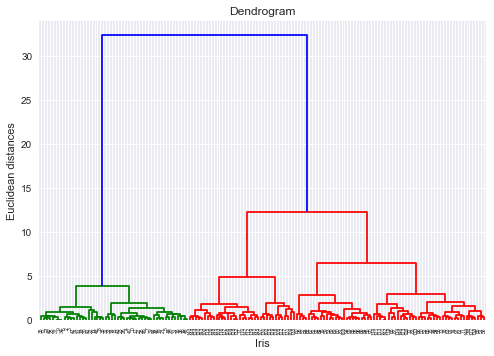

In [239]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
dendrogram=sch.dendrogram(sch.linkage(iris.data,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Iris')
plt.ylabel('Euclidean distances')
plt.show()

In [240]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(iris.data)

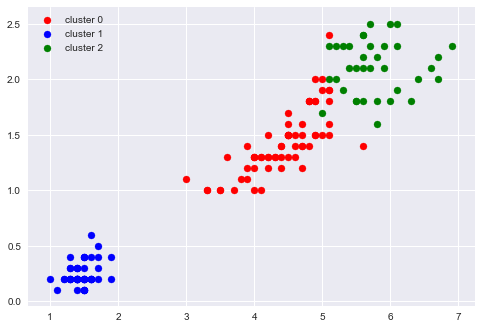

In [247]:
plt.scatter(iris.data[y_hc == 0,2], iris.data[y_hc == 0,3], color="red", label = 'cluster 0 ')
plt.scatter(iris.data[y_hc == 1,2], iris.data[y_hc == 1,3], color="blue", label = 'cluster 1 ')
plt.scatter(iris.data[y_hc == 2,2], iris.data[y_hc == 2,3], color="green", label = 'cluster 2 ')
plt.legend()
plt.show()

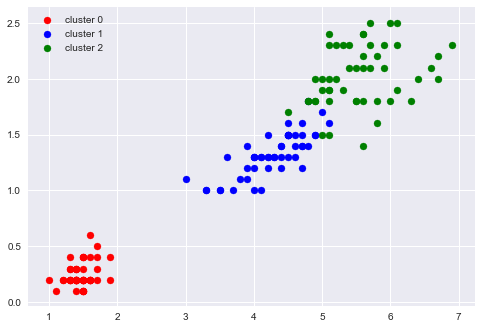

In [249]:
plt.scatter(iris.data[iris.target == 0,2], iris.data[iris.target == 0,3], color="red", label = 'cluster 0 ')
plt.scatter(iris.data[iris.target == 1,2], iris.data[iris.target == 1,3], color="blue", label = 'cluster 1 ')
plt.scatter(iris.data[iris.target == 2,2], iris.data[iris.target == 2,3], color="green", label = 'cluster 2 ')
plt.legend()
plt.show()

## KMeans 分群

In [255]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, init= 'k-means++', random_state = 123)

In [257]:
y_kmeans = kmeans.fit_predict(iris.data)

In [259]:
kmeans.cluster_centers_

array([[ 6.85      ,  3.07368421,  5.74210526,  2.07105263],
       [ 5.006     ,  3.418     ,  1.464     ,  0.244     ],
       [ 5.9016129 ,  2.7483871 ,  4.39354839,  1.43387097]])

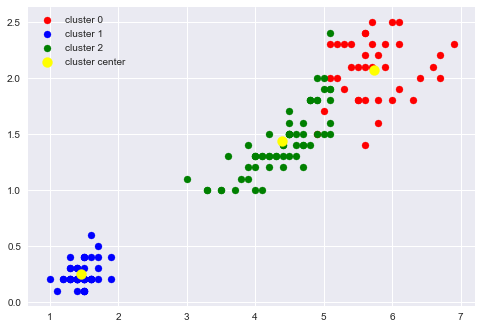

In [262]:
plt.scatter(iris.data[y_kmeans == 0,2], iris.data[y_kmeans == 0,3], color="red", label = 'cluster 0 ')
plt.scatter(iris.data[y_kmeans == 1,2], iris.data[y_kmeans == 1,3], color="blue", label = 'cluster 1 ')
plt.scatter(iris.data[y_kmeans == 2,2], iris.data[y_kmeans == 2,3], color="green", label = 'cluster 2 ')

plt.scatter(kmeans.cluster_centers_[:,2], kmeans.cluster_centers_[:,3], color="yellow", label = 'cluster center',s = 100)
plt.legend()
plt.show()

## 客戶分群

In [263]:
import pandas
customers = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/customers.csv')

In [269]:
data = customers.iloc[:,[3,4]]

In [271]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, init = 'k-means++', random_state = 123)

In [276]:
y_kmeans = kmeans.fit_predict(data)

In [277]:
y_kmeans

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0, 3, 4,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1])

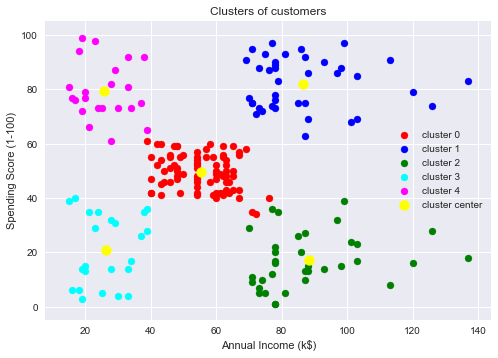

In [282]:
plt.scatter(data.iloc[y_kmeans == 0,0], data.iloc[y_kmeans == 0,1], color="red", label = 'cluster 0 ')
plt.scatter(data.iloc[y_kmeans == 1,0], data.iloc[y_kmeans == 1,1], color="blue", label = 'cluster 1 ')
plt.scatter(data.iloc[y_kmeans == 2,0], data.iloc[y_kmeans == 2,1], color="green", label = 'cluster 2 ')
plt.scatter(data.iloc[y_kmeans == 3,0], data.iloc[y_kmeans == 3,1], color="cyan", label = 'cluster 3 ')
plt.scatter(data.iloc[y_kmeans == 4,0], data.iloc[y_kmeans == 4,1], color="magenta", label = 'cluster 4 ')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color="yellow", label = 'cluster center',s = 100)
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## 評估分群數量

In [283]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, init = 'k-means++', random_state = 123)

In [285]:
y_kmeans = kmeans.fit_predict(data)
kmeans.inertia_

44448.455447933709

In [288]:
x = []
y = []
for i in range(1,11):
    #print(i)
    kmeans = KMeans(n_clusters=i, init = 'k-means++', random_state = 123)
    kmeans.fit(data)
    #print(i, kmeans.inertia_)
    x.append(i)
    y.append(kmeans.inertia_)

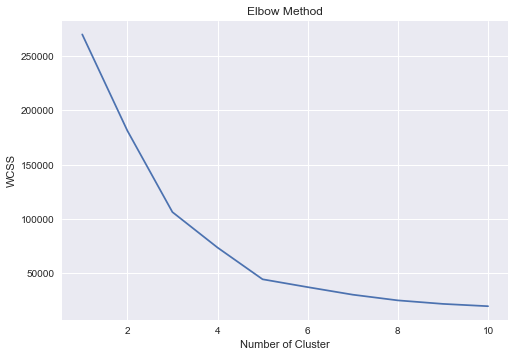

In [291]:
plt.plot(x,y)
plt.title('Elbow Method')
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')
plt.show()

In [293]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, init = 'k-means++', random_state = 123)

In [294]:
y_kmeans = kmeans.fit_predict(data)
kmeans.inertia_

44448.455447933709

In [295]:
from sklearn import metrics
print("Silhouette Coefficient: %0.3f"%metrics.silhouette_score(data,y_kmeans))

Silhouette Coefficient: 0.554


In [302]:
x = []
y = []
for i in range(2,11):
    #print(i)
    kmeans = KMeans(n_clusters=i, init = 'k-means++', random_state = 123)
    y_kmeans = kmeans.fit_predict(data)
    x.append(i)
    y.append(metrics.silhouette_score(data,y_kmeans))

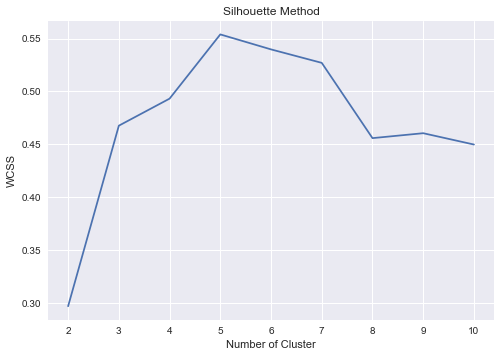

In [304]:
plt.plot(x,y)
plt.title('Silhouette Method')
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')
plt.show()

## 比較不同分群方法

In [305]:
# ward
ward=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
y_ward=ward.fit_predict(X)

#complete
complete=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='complete')
y_complete=complete.fit_predict(X)

# kmeans
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(X)

for est,title in zip([y_ward,y_complete,y_kmeans],['ward','complete','kmeans']):
    print(title,metrics.silhouette_score(X,est))

ward 0.586162346839
complete 0.543725875695
kmeans 0.60423911852


In [312]:
%pylab inline
import numpy as np
from PIL import Image 
Image.open('handwriting.png')

Populating the interactive namespace from numpy and matplotlib


In [313]:
img
img2=img.rotate(-90).convert("L")
imgarr=np.array(img2)

In [318]:
#binarize(imgarr,0)

In [319]:
from sklearn.preprocessing import binarize
imagedata=np.where(1-binarize(imgarr,0)==1)

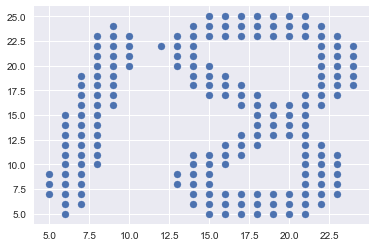

In [321]:
plt.scatter(imagedata[0], imagedata[1])

In [334]:
X=np.column_stack([imagedata[0],imagedata[1]])
kmeans=KMeans(n_clusters=2,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(X)

In [335]:
imagedata[0]

array([ 5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,
       10, 10, 10, 10, 12, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14,
       14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20,
       20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21,
       21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22,
       22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23,
       23, 23, 24, 24, 24, 24, 24], dtype=int64)

In [340]:
X[y_kmeans == 0,0]

array([ 7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,
        9,  9,  9,  9, 10, 10, 10, 10, 12, 13, 13, 13, 13, 14, 14, 14, 14,
       14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 17,
       17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 20,
       20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22,
       22, 22, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24], dtype=int64)

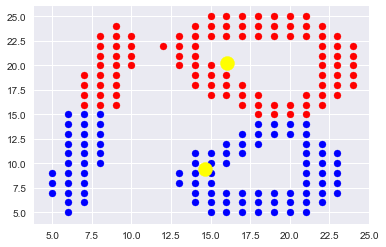

In [344]:
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans==0,1], color="red")
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans==1,1], color="blue")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=200, color="yellow")

plt.show()

In [347]:
from sklearn.cluster import DBSCAN
dbs=DBSCAN(eps=1,min_samples=3)
y_dbs=dbs.fit_predict(X)

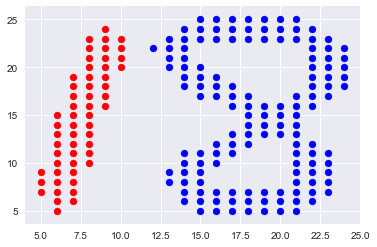

In [348]:
plt.scatter(X[y_dbs == 0,0], X[y_dbs==0,1], color="red")
plt.scatter(X[y_dbs == 1,0], X[y_dbs==1,1], color="blue")

## 降低維度

In [350]:

from sklearn.decomposition import PCA
X= iris.data
pca = PCA(n_components=2)
pca.fit(X)

X_reduced = pca.transform(X)
X_reduced.shape

(150, 2)

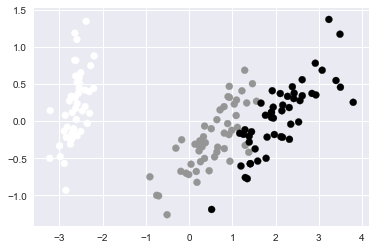

In [355]:

from matplotlib import pyplot as plt
plt.scatter(X_reduced[:, 0], X_reduced[:, 1],c = iris.target)
plt.show()